In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [14]:
mirna_sequence_records_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/mirna_sequence_records.csv"
data_df = pd.read_csv(mirna_sequence_records_path, dtype={"source_db_version": str, "taxon_id": str})
species_taxon_id_and_lineage_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/species_taxon_id_and_lineage.csv"
species_df = pd.read_csv(species_taxon_id_and_lineage_path, dtype={"taxon_id": str})

In [8]:
def set_plot_styles():

    styles = {
        # remove the top and right spines from the plots
        'axes.spines.right': False,
        'axes.spines.top': False,
        
        # color palette configuration
        'image.lut': 256,
        'axes.prop_cycle': mpl.cycler('color', ['#AF3029','#5E409D', '#BC5215', '#AD8301', '#66800B', '#24837B', '#205EA6' , '#A02F6F']),
        
        # retina figures configuration
        'figure.dpi': 300,
        'savefig.dpi': 300,
    }
    
    mpl.rcParams.update(styles)

In [9]:
def get_organism_category(taxon_id):
    lineage = species_df.loc[species_df['taxon_id'] == taxon_id, 'lineage'].values
    if len(lineage) == 0 or pd.isna(lineage[0]):
        return "Other"
    lineage = lineage[0]
    if "Viridiplantae" in lineage:
        return "Plant"
    elif "Metazoa" in lineage:
        return "Animal"
    elif "Fungi" in lineage:
        return "Fungus"
    elif "Viruses" in lineage:
        return "Virus"
    elif "Bacteria" in lineage:
        return "Bacteria"
    else:
        return "Other"

In [16]:
data_df['organism_category'] = data_df['taxon_id'].apply(get_organism_category)
all_db_df = data_df.copy()
all_db_df['source_db'] = 'All databases'
combined_df = pd.concat([all_db_df, data_df], axis=0)


In [17]:
category_counts = combined_df.groupby(['source_db', 'organism_category']).size().reset_index(name='count')
category_counts['percentage'] = category_counts.groupby('source_db')["count"].transform(lambda x: x / x.sum() * 100)
print(category_counts)

        source_db organism_category   count  percentage
0   All databases            Animal   77310   43.041343
1   All databases          Bacteria       6    0.003340
2   All databases             Other     207    0.115245
3   All databases             Plant  100350   55.868566
4   All databases             Virus    1745    0.971506
5          PmiREN             Plant   40676  100.000000
6        VIRmiRNA          Bacteria       6    0.458716
7        VIRmiRNA             Other       2    0.152905
8        VIRmiRNA             Virus    1300   99.388379
9         mirBase            Animal   37821   77.367291
10        mirBase             Other     205    0.419352
11        mirBase             Plant   10414   21.303058
12        mirBase             Virus     445    0.910300
13      mirGeneDB            Animal   39489  100.000000
14       sRNAanno             Plant   49260  100.000000


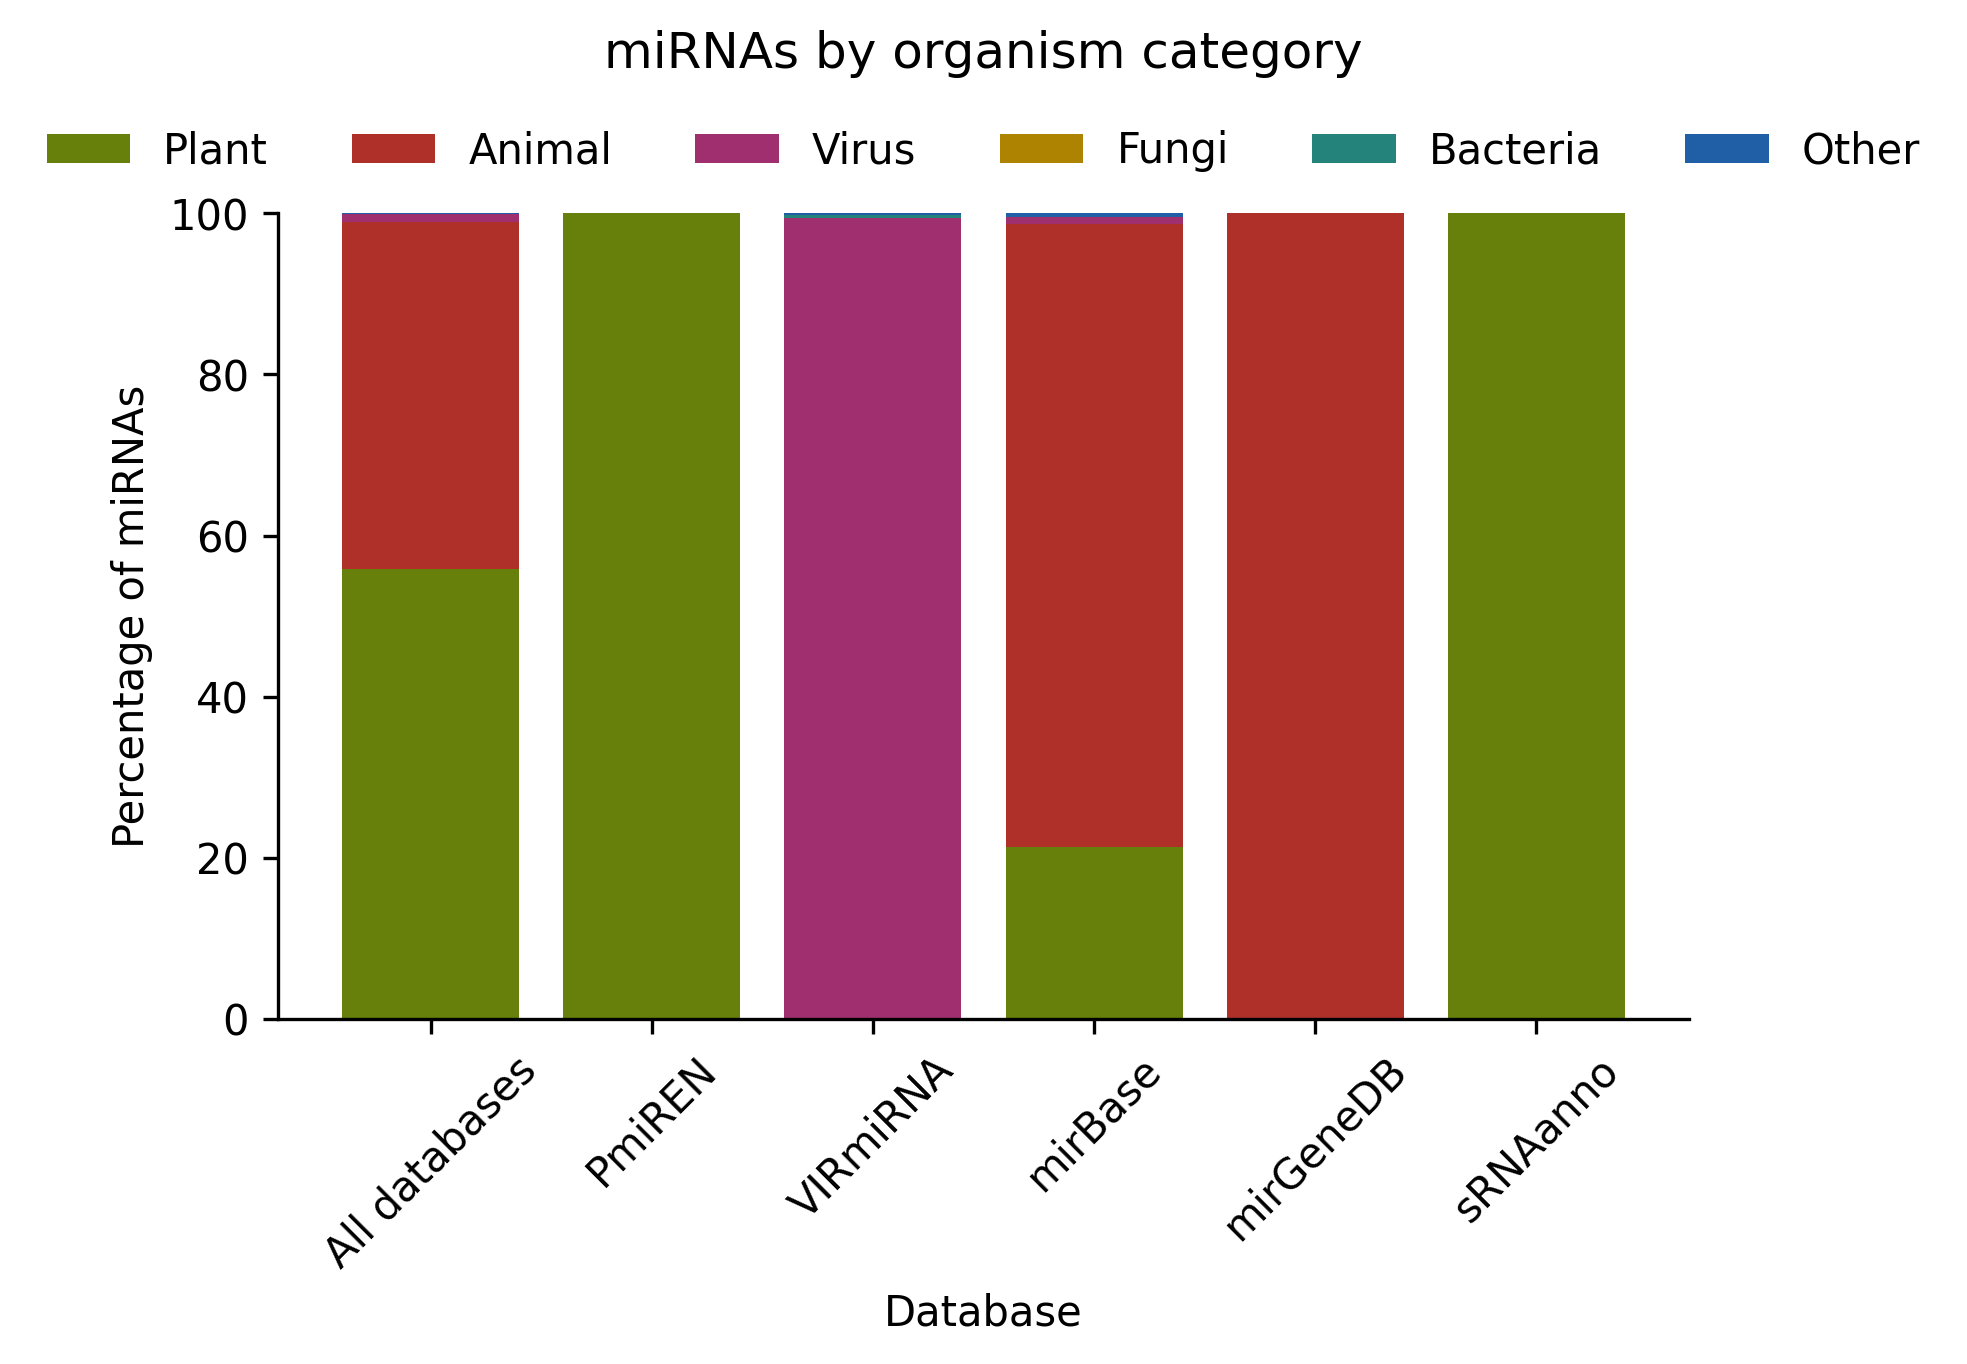

In [ ]:
dbs = category_counts["source_db"].unique()
categories_order = ["Plant", "Animal", "Virus", "Fungi", "Bacteria", "Other"]

color_map = {
    "Plant" : "#66800B",
    "Animal" : '#AF3029',
    "Virus" : "#A02F6F",
    "Fungi" : "#AD8301",
    "Bacteria" : "#24837B",
    "Other" : "#205EA6"
}

bottom = np.zeros(len(dbs))
for cat in categories_order:
    values = category_counts[category_counts["organism_category"]==cat].set_index("source_db").reindex(dbs)["percentage"].fillna(0)
    plt.bar(dbs, values, bottom=bottom, label=cat, color=color_map.get(cat, "gray"))
    bottom += values

set_plot_styles()
plt.ylabel("Percentage of miRNAs")
plt.xlabel("Database")
plt.title("miRNAs by organism category", y=1.15)
plt.legend(ncol = 6, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/plots/miRNAs_by_organism_category.png")
plt.show()
plt.close()